In [1]:
import pymongo
from spearmint.utils import compression
from spearmint.utils import functions
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from spearmint.tasks import input_space
sns.set()

In [2]:
opt_val = 0

### Connecting MongoDB server

In [3]:
mongo_conn = pymongo.MongoClient('127.0.0.1',27017)
mongo_conn.list_database_names()

[u'admin', u'config', u'local', u'spearmint']

In [4]:
mongo_db = mongo_conn['spearmint']

In [5]:
mongo_db.list_collection_names()

[u'levy_8-55.hypers',
 u'levy_2-68.recommendations',
 u'levyN13_1-88.jobs',
 u'levyN13_1-73.start-time',
 u'levy_10-16.jobs',
 u'levy_4-38.jobs',
 u'levyN13_2-15.hypers',
 u'levy_6-6.recommendations',
 u'levy_7-7.start-time',
 u'levy_8-35.hypers',
 u'levy_2-42.jobs',
 u'levyN13_2-91.start-time',
 u'levy_6-52.start-time',
 u'levy_2-85.hypers',
 u'levyN13_2-66.jobs',
 u'levy_2-17.jobs',
 u'levy_8-88.jobs',
 u'levy_6-51.recommendations',
 u'levy_1-87.recommendations',
 u'levy_1-91.hypers',
 u'levy_7-45.recommendations',
 u'levyN13_1-50.recommendations',
 u'levyN13_3-93.jobs',
 u'levy_10-41.jobs',
 u'levy_9-50.jobs',
 u'levy_5-2.start-time',
 u'levy_1-59.jobs',
 u'levy_1-13.start-time',
 u'levy_2-74.jobs',
 u'levy_4-31.start-time',
 u'levy_4-73.jobs',
 u'levyN13_3-42.jobs',
 u'levyN13_3-59.jobs',
 u'levy_2-64.recommendations',
 u'levy_5-57.jobs',
 u'levy_10-97.jobs',
 u'levyN13_3-66.jobs',
 u'levyN13_2-63.jobs',
 u'levy_5-96.hypers',
 u'levy_4-88.jobs',
 u'levy_5-18.jobs',
 u'levy_6-45.rec

### Loading document from database

In [6]:
jobs1_exp = []
jobs2_exp = []
jobs3_exp = []
jobs4_exp = []
jobs5_exp = []
jobs6_exp = []
jobs7_exp = []
jobs8_exp = []
jobs9_exp = []
jobs10_exp = []
jobs11_exp = []


recomm1_exp = []
recomm2_exp = []
recomm3_exp = []
recomm4_exp = []
recomm5_exp = []
recomm6_exp = []
recomm7_exp = []
recomm8_exp = []
recomm9_exp = []
recomm10_exp = []
recomm11_exp = []

for i in range(100):
    jobs1_exp.append(mongo_db["levy_1-%d.jobs"%i])
    jobs2_exp.append(mongo_db["levy_2-%d.jobs"%i])
    #jobs3_exp.append(mongo_db["levy_3-%d.jobs"%i])
    jobs4_exp.append(mongo_db["levy_4-%d.jobs"%i])
    jobs5_exp.append(mongo_db["levy_5-%d.jobs"%i])
    jobs6_exp.append(mongo_db["levy_6-%d.jobs"%i])
    jobs7_exp.append(mongo_db["levy_7-%d.jobs"%i])
    jobs8_exp.append(mongo_db["levy_8-%d.jobs"%i])
    jobs9_exp.append(mongo_db["levy_9-%d.jobs"%i])
    jobs10_exp.append(mongo_db["levy_10-%d.jobs"%i])
    #jobs11_exp.append(mongo_db["levy_11_KN-%d.jobs"%i])
    
    recomm1_exp.append(mongo_db["levy_1-%d.recommendations"%i])
    recomm2_exp.append(mongo_db["levy_2-%d.recommendations"%i])
    #recomm3_exp.append(mongo_db["levy_3-%d.recommendations"%i])
    recomm4_exp.append(mongo_db["levy_4-%d.recommendations"%i])
    recomm5_exp.append(mongo_db["levy_5-%d.recommendations"%i])
    recomm6_exp.append(mongo_db["levy_6-%d.recommendations"%i])
    recomm7_exp.append(mongo_db["levy_7-%d.recommendations"%i])
    recomm7_exp.append(mongo_db["levy_7-%d.recommendations"%i])
    recomm8_exp.append(mongo_db["levy_8-%d.recommendations"%i])
    recomm9_exp.append(mongo_db["levy_9-%d.recommendations"%i])
    recomm10_exp.append(mongo_db["levy_10-%d.recommendations"%i])
    #recomm11_exp.append(mongo_db["levy_11_KN-%d.recommendations"%i])

In [29]:
jobsKN_exp = []
recommKN_exp = []
for i in range(50):
    jobsKN_exp.append(mongo_db["levy_1_KN-%d.jobs"%i])
    recommKN_exp.append(mongo_db["levy_1_KN-%d.recommendations"%i])

In [30]:
levy1_objs = functions.get_objective(recomm1_exp)
levy2_objs = functions.get_objective(recomm2_exp)
#levy3_objs = functions.get_objective(recomm3_exp)
levy4_objs = functions.get_objective(recomm4_exp)
levy5_objs = functions.get_objective(recomm5_exp)
levy6_objs = functions.get_objective(recomm6_exp)
levy7_objs = functions.get_objective(recomm7_exp)
levy8_objs = functions.get_objective(recomm8_exp)
levy9_objs = functions.get_objective(recomm9_exp)
levy10_objs = functions.get_objective(recomm10_exp)
#levy11_objs = functions.get_objective(recomm11_exp)

levyKN_objs = functions.get_objective(recommKN_exp)

In [31]:
levy1_objs = np.average(levy1_objs, axis = 0)
levy2_objs = np.average(levy2_objs, axis = 0)
levy4_objs = np.average(levy4_objs, axis = 0)
#levy3_objs = np.average(levy3_objs, axis = 0)
levy5_objs = np.average(levy5_objs, axis = 0)
levy6_objs = np.average(levy6_objs, axis = 0)
levy7_objs = np.average(levy7_objs, axis = 0)
levy8_objs = np.average(levy8_objs, axis = 0)
levy9_objs = np.average(levy9_objs, axis = 0)
levy10_objs = np.average(levy10_objs, axis = 0)
#levy11_objs = np.average(levy11_objs, axis = 0)

levyKN_objs = np.average(levyKN_objs, axis = 0)

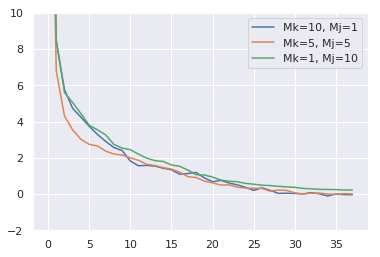

In [9]:
plt.plot(levy1_objs[:-2], label = 'Mk=10, Mj=1')
plt.plot(levy2_objs[:-2], label = 'Mk=5, Mj=5')
plt.plot(levy4_objs[:-2], label = 'Mk=1, Mj=10')
plt.ylim(-2,10)
plt.legend()

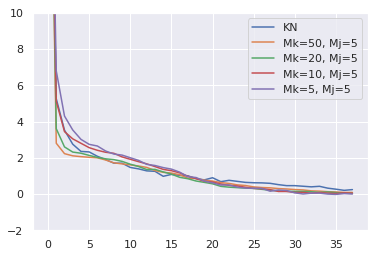

In [32]:
plt.plot(levyKN_objs[:-2], label = 'KN')
plt.plot(levy10_objs[:-2], label = 'Mk=50, Mj=5')
plt.plot(levy9_objs[:-2], label = 'Mk=20, Mj=5')
plt.plot(levy8_objs[:-2], label = 'Mk=10, Mj=5')
plt.plot(levy2_objs[:-2], label = 'Mk=5, Mj=5')
#plt.plot(levy6_objs[:-2], label = 'Mk=3, Mj=5')
#plt.plot(levy7_objs[:-2], label = 'Mk=1, Mj=5')
#plt.plot(levy11_objs[:-2], label = 'using KN')
plt.ylim(-2,10)
plt.legend()

### Getting immediate Regret IR measure

In [11]:
def levy_4d(x1,x2,x3,x4):
	w1 = 1 + (x1-1)/4
	w2 = 1 + (x2-1)/4
	w3 = 1 + (x3-1)/4
	w4 = 1 + (x4-1)/4

	a = np.sin(np.pi * w1)**2
	b = ((w1-1)**2)*(1+10*(np.sin(np.pi*w1+1)**2)) + ((w2-1)**2)*(1+10*(np.sin(np.pi*w2+1)**2)) + ((w3-1)**2)*(1+10*(np.sin(np.pi*w3+1)**2)) 
	c = ((w4-1)**2) * (1 + (np.sin(2*np.pi*w4)**2))

	result = a + b + c

	return result

In [12]:
def log_ir(input_list):
    return np.log10(np.abs(opt_val - levy_4d(*input_list)))

In [13]:
def get_irs_whole_exp(locs_exp):
    irs_exp = []
    for exp_num in range(len(locs_exp)):
        irs_iter = []
        locs_cur_exp = locs_exp[exp_num]
        
        for locs in locs_cur_exp:
            irs_iter.append(log_ir(locs))
            
        irs_exp.append(irs_iter)
        
    return irs_exp

In [14]:
def get_avg_irs(irs_exp):
    avg_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs


In [15]:
def get_avg_irs2(irs_exp):
    avg_irs = []
    for iter_num in range(50):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
            
        avg_irs.append(np.average(cur_iter_irs))
        
    return avg_irs



In [16]:
def get_median_irs(irs_exp):
    median_irs = []
    for iter_num in range(len(irs_exp[0])):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs



In [17]:
def get_median_irs2(irs_exp):
    median_irs = []
    for iter_num in range(50):
        cur_iter_irs = []
        for exp_num in range(len(irs_exp)):
            cur_iter_irs.append(irs_exp[exp_num][iter_num])
        
        median_irs.append(np.median(cur_iter_irs))
        
    return median_irs



In [33]:
locs1_exp = functions.get_recomm(recomm1_exp)
locs2_exp = functions.get_recomm(recomm2_exp)
#locs3_exp = functions.get_recomm(recomm3_exp)
locs4_exp = functions.get_recomm(recomm4_exp)
locs5_exp = functions.get_recomm(recomm5_exp)
locs6_exp = functions.get_recomm(recomm6_exp)
locs7_exp = functions.get_recomm(recomm7_exp)
locs8_exp = functions.get_recomm(recomm8_exp)
locs9_exp = functions.get_recomm(recomm9_exp)
locs10_exp = functions.get_recomm(recomm10_exp)
#locs11_exp = functions.get_recomm(recomm11_exp)

locsKN_exp = functions.get_recomm(recommKN_exp)

In [35]:
irs1_exp = get_irs_whole_exp(locs1_exp)
irs2_exp = get_irs_whole_exp(locs2_exp)
#irs3_exp = get_irs_whole_exp(locs3_exp)
irs4_exp = get_irs_whole_exp(locs4_exp)
irs5_exp = get_irs_whole_exp(locs5_exp)
irs6_exp = get_irs_whole_exp(locs6_exp)
irs7_exp = get_irs_whole_exp(locs7_exp)
irs8_exp = get_irs_whole_exp(locs8_exp)
irs9_exp = get_irs_whole_exp(locs9_exp)
irs10_exp = get_irs_whole_exp(locs10_exp)

irsKN_exp = get_irs_whole_exp(locsKN_exp)

In [36]:
irs1_median = get_median_irs(irs1_exp)
irs2_median = get_median_irs(irs2_exp)
#irs3_median = get_median_irs(irs3_exp)
irs4_median = get_median_irs(irs4_exp)
irs5_median = get_median_irs(irs5_exp)
irs6_median = get_median_irs(irs6_exp)
irs7_median = get_median_irs(irs7_exp)
irs8_median = get_median_irs(irs8_exp)
irs9_median = get_median_irs(irs9_exp)
irs10_median = get_median_irs(irs10_exp)

irsKN_median = get_median_irs(irsKN_exp)

In [37]:
irs1_avg = get_avg_irs(irs1_exp)
irs2_avg = get_avg_irs(irs2_exp)
#irs3_avg = get_avg_irs(irs3_exp)
irs4_avg = get_avg_irs(irs4_exp)
irs5_avg = get_avg_irs(irs5_exp)
irs6_avg = get_avg_irs(irs6_exp)
irs7_avg = get_avg_irs(irs7_exp)
irs8_avg = get_avg_irs(irs8_exp)
irs9_avg = get_avg_irs(irs9_exp)
irs10_avg = get_avg_irs(irs10_exp)

irsKN_avg = get_avg_irs(irsKN_exp)

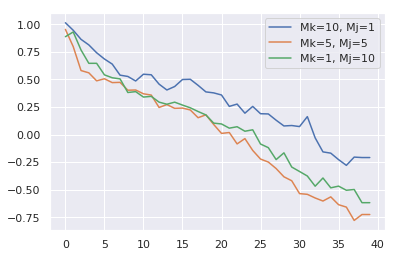

In [22]:
plt.plot(irs1_median,label='Mk=10, Mj=1')
plt.plot(irs2_median,label='Mk=5, Mj=5')
#plt.plot(irs3_median,label='Mk=1, Mj=1')
plt.plot(irs4_median,label='Mk=1, Mj=10')
plt.legend()



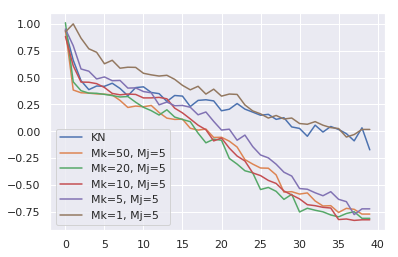

In [39]:
plt.plot(irsKN_median,label='KN')
plt.plot(irs10_median,label='Mk=50, Mj=5')
plt.plot(irs9_median,label='Mk=20, Mj=5')
plt.plot(irs8_median,label='Mk=10, Mj=5')
plt.plot(irs2_median,label='Mk=5, Mj=5')
#plt.plot(irs6_median,label='Mk=3, Mj=5')

plt.plot(irs7_median,label='Mk=1, Mj=5')
#plt.plot(irs11_median,label='using KN')
plt.legend()



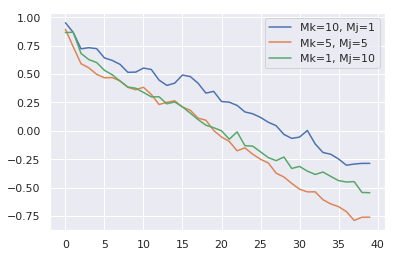

In [25]:
plt.plot(irs1_avg,label='Mk=10, Mj=1')
plt.plot(irs2_avg,label='Mk=5, Mj=5')
#plt.plot(irs3_avg,label='Mk=1, Mj=1')
plt.plot(irs4_avg,label='Mk=1, Mj=10')
plt.legend()


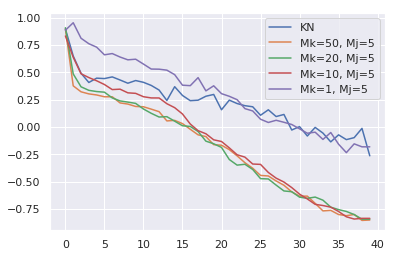

In [40]:
plt.plot(irsKN_avg,label='KN')

plt.plot(irs10_avg,label='Mk=50, Mj=5')
plt.plot(irs9_avg,label='Mk=20, Mj=5')
plt.plot(irs8_avg,label='Mk=10, Mj=5')
#plt.plot(irs2_avg,label='Mk=5, Mj=5')
#plt.plot(irs6_avg,label='Mk=3, Mj=5')

plt.plot(irs7_avg,label='Mk=1, Mj=5')
#plt.plot(irs11_avg,label='using KN')
plt.legend()
